In [140]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
import re
import copy
from collections import Counter


In [164]:
# reads csv and removes the subs
df = pd.read_csv("matches.csv", header=None)
df = df[(df.index + 1) % 4 != 0] 
df.head(20)

,0,1
0,Daniel Bielin,Jerry Wang
1,William Zhang,Clarence Un
2,Andy Wang,Edwin Yee
4,Isabelle Rusli,Jessica Wang
5,Julie Yang,Sydney Lim
6,Hallie Hou,Crystal Le
8,Daniel Bielin/Andrew Wang,Jerry Wang/Clarence Un
9,Yunus Chang/Brenden Cheung,Zach Streifer/Thomas Yu
10,Andy Wang/Harry Qin,Samuel Fong/David Qiguan
12,Isabelle Rusli/Julie Yang,Jessica Wang/Junyu Deng


In [142]:
matches = []
for index, row in df.iterrows(): 
    matches.append([row[0], row[1]])
print(matches)
print(len(matches))

[['Daniel Bielin', 'Jerry Wang'], ['William Zhang', 'Clarence Un'], ['Andy Wang', 'Edwin Yee'], ['Isabelle Rusli', 'Jessica Wang'], ['Julie Yang', 'Sydney Lim'], ['Hallie Hou', 'Crystal Le'], ['Daniel Bielin/Andrew Wang', 'Jerry Wang/Clarence Un'], ['Yunus Chang/Brenden Cheung', 'Zach Streifer/Thomas Yu'], ['Andy Wang/Harry Qin', 'Samuel Fong/David Qiguan'], ['Isabelle Rusli/Julie Yang', 'Jessica Wang/Junyu Deng'], ['Kyra Sunil/Isa Griffis', 'Cori Yim/Emily Lombardi'], ['Emily La/Kelly Ha', 'Yongsi Zhu/Crystal Le'], ['William Zhang/Rinna Yu', 'Zach Streifer/Junyu Deng'], ['Harry Qin/Miranda Li', 'Thomas Yu/Sydney Lim'], ['Yu-Chen Lung/Emily La', 'Edwin Yee/Emily Lombardi'], ['Andrew Wang', 'Harshith Kaveri'], ['Brenden Cheung', 'Matthew Go'], ['JJ Choon', 'Vik Sirivong'], ['Isabelle Rusli', 'Celeste Liu'], ['Julie Yang', 'Erika Lai'], ['Hallie Hou', 'Athena Aguilar'], ['Ethan Lin/Jeremy Chen', 'Andrew Yeow/Muhammad Ramadhan'], ['JJ Choon/Samuel Chua Jia Cong', 'Matthew Go/Daniel Chang'

In [143]:
# remove whitespace and forfeited matches
# reformat matches to be a set of tuples of players in the match
    
allPlayerInstances = []
reformattedMatches = []


isNotForfeit = lambda entry : type(entry) == str and not ("Forfeited" in entry or "Forfeit" in entry)
matches = [match for match in matches if isNotForfeit(match[0]) and isNotForfeit(match[1])]
print(len(matches))

for match in matches:
    matchEntry = []
    for i in range(2):
        matchPlayers = match[i].split('/')
        for player in matchPlayers:
            player = player.strip()
            allPlayerInstances.append(player)
            matchEntry.append(player)

    reformattedMatches.append(matchEntry)
            
players = Counter(allPlayerInstances)
print(players.most_common())

reformattedMatches = [tuple(match) for match in reformattedMatches]
print(reformattedMatches)

            

144
[('Erika Lai', 10), ('Athena Aguilar', 10), ('Harshith Kaveri', 8), ('Matthew Go', 8), ('Andrew Yeow', 8), ('Muhammad Ramadhan', 8), ('Vivian Yuan', 8), ('Vik Sirivong', 6), ('Mihir Raja', 6), ('Kyle Pan', 6), ('Venkata Neti', 6), ('Melody Yang', 6), ('Dylan Zou', 6), ('Anthony Wu', 6), ('Tammy Xie', 6), ('Janelle Chan', 6), ('Elisa Liu', 6), ('Kailin Liu', 6), ('Chenyi Zhao', 6), ('Joanna Chou', 6), ('Emma Chen', 5), ('Daniel Fung', 5), ('Manmeeth Nagesh', 5), ('Lilly Nguyen', 5), ('Wein Hsu', 5), ('Max Li', 5), ('Jessica Nguy', 5), ('Julia Richardson', 5), ('Jerry Wang', 4), ('Clarence Un', 4), ('Edwin Yee', 4), ('Isabelle Rusli', 4), ('Jessica Wang', 4), ('Julie Yang', 4), ('Sydney Lim', 4), ('Crystal Le', 4), ('Zach Streifer', 4), ('Thomas Yu', 4), ('Junyu Deng', 4), ('Emily Lombardi', 4), ('Reno Guo', 4), ('Kaia To', 4), ('Jay Chea', 4), ('Jordan Hsu', 4), ('Meghan Wong', 4), ('Timothy Liu', 4), ('Oscar Yan', 4), ('Lantian Xiang', 4), ('Faiz Ishak', 4), ('Yifei Zheng', 4), ('S

In [210]:
# dictionary of player to the player's matches 

masterDictOfPlayerMatches = dict()

for match in reformattedMatches:
    for player in match:
        if player in masterDictOfPlayerMatches:
            masterDictOfPlayerMatches[player].add(match)
        else:
            masterDictOfPlayerMatches[player] = {match}

copyDictOfPlayerMatches = copy.deepcopy(masterDictOfPlayerMatches)

print(copyDictOfPlayerMatches['Harshith Kaveri'])



{('Max Li', 'Kailin Liu', 'Harshith Kaveri', 'Vivian Yuan'), ('Ethan Lin', 'Julie Yang', 'Harshith Kaveri', 'Vivian Yuan'), ('Andrew Wang', 'Harshith Kaveri'), ('Mihir Raja', 'Tammy Xie', 'Harshith Kaveri', 'Vivian Yuan'), ('Mihir Raja', 'Harshith Kaveri'), ('Daniel Fung', 'Harshith Kaveri'), ('Reno Guo', 'Harshith Kaveri'), ('Huy Nguyen', 'Lynette Loo', 'Harshith Kaveri', 'Vivian Yuan')}


In [177]:
# helper function to score matches

def scoreMatch(match):
    score = 0
    for player in match:
        score += (len(copyDictOfPlayerMatches[player]) - 1) # note: -1 to exclude the match being scored
    return score if len(match) == 4 else score*2 # doubles match score if it's a single game





# print(copyDictOfPlayerMatches['Benji Ryujin'])
# print(copyDictOfPlayerMatches['Andrew Li'])
# print(copyDictOfPlayerMatches['Bowen Yang'])
# print(copyDictOfPlayerMatches['Nam Hoang'])

# scoreMatch(('Benji Ryujin', 'Andrew Li', 'Bowen Yang', 'Nam Hoang'))

{('Benji Ryujin', 'Andrew Li', 'Matthew Go', 'Willy Su'), ('Benji Ryujin', 'Andrew Li', 'Bowen Yang', 'Nam Hoang'), ('Benji Ryujin', 'Kaia To', 'Andrew Yeow', 'Athena Aguilar')}
{('Benji Ryujin', 'Andrew Li', 'Matthew Go', 'Willy Su'), ('Benji Ryujin', 'Andrew Li', 'Bowen Yang', 'Nam Hoang'), ('Andrew Li', 'Macy Fu', 'Jennifer Zheng', 'Alan Le')}
{('Benji Ryujin', 'Andrew Li', 'Bowen Yang', 'Nam Hoang')}
{('Benji Ryujin', 'Andrew Li', 'Bowen Yang', 'Nam Hoang'), ('Vivek Srinivasan', 'Nam Hoang')}


5

TODO: label plot with title and labels 

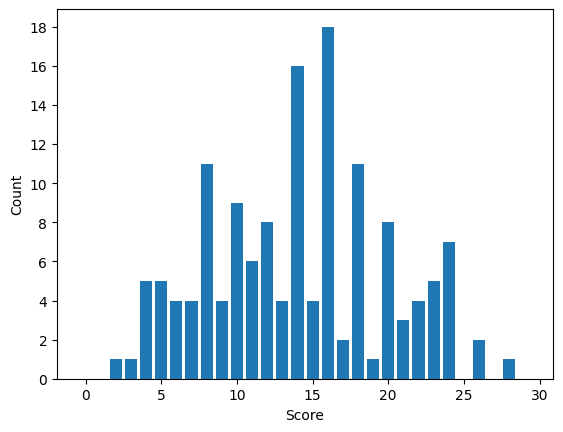

In [146]:
# plot score to number of matches with that score

scoreX = list(range(0, 30))
countY = [0] * 30


for match in reformattedMatches:
    countY[scoreMatch(match)] += 1

fig, ax  = plt.subplots()
ax.bar(scoreX, countY)

minimum_ele = min(countY)
maximum_ele = max(countY)
new_list = range(math.floor(min(countY)), math.ceil(max(countY))+1, 2)

plt.yticks(new_list)


ax.set_xlabel('Score')
ax.set_ylabel('Count')

plt.show()




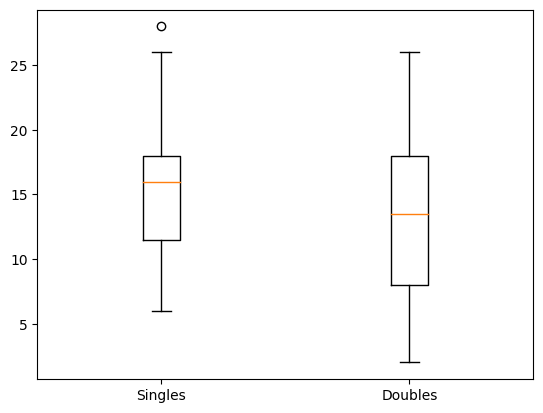

               0
count  60.000000
mean   15.233333
std     5.387892
min     6.000000
25%    11.500000
50%    16.000000
75%    18.000000
max    28.000000
               0
count  84.000000
mean   13.250000
std     6.087465
min     2.000000
25%     8.000000
50%    13.500000
75%    18.000000
max    26.000000


In [147]:
# analyze singles and doubles

singles = []
doubles = []


for match in reformattedMatches:
    if len(match) == 2:
        singles.append(scoreMatch(match))
    else:
        doubles.append(scoreMatch(match))

df_singles = pd.DataFrame(singles)
df_doubles = pd.DataFrame(doubles)

fig, ax = plt.subplots()
ax.boxplot([singles, doubles], labels=['Singles', 'Doubles'])
plt.show()

print(df_singles.describe())
print(df_doubles.describe())



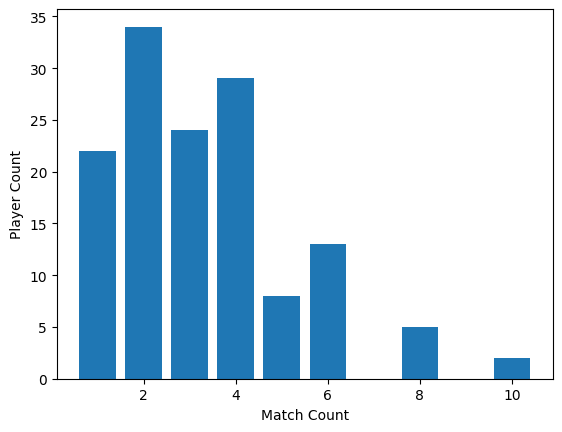

In [218]:
# group players based on # of matches
# sort those matches
# 
groupedPlayers = dict()

for player, count in players.most_common():
    if not count in groupedPlayers:
        groupedPlayers[count] = [player]
    else:
        groupedPlayers[count].append(player)

sortedGroupedPlayers = sorted(list(groupedPlayers.items()), reverse=True)
sortedGroupedPlayers = [list(x) for x in sortedGroupedPlayers]


matchCountX = [x[0] for x in sortedGroupedPlayers]
playerCountY = [len(x[1]) for x in sortedGroupedPlayers]

fig, ax  = plt.subplots()
ax.bar(matchCountX, playerCountY)

ax.set_xlabel('Match Count')
ax.set_ylabel('Player Count')

plt.show()



In [163]:
sortedGroupedPlayersFinal = []

for index, info in enumerate(sortedGroupedPlayers):
    matchList = []
    for player in info[1]:
        for match in masterDictOfPlayerMatches[player]:
            if not match in matchList:
                matchList.append(match)

    sortedGroupedPlayersFinal.append(sortedGroupedPlayers[index] + [sorted(matchList, key=scoreMatch, reverse=True)])

sortedGroupedPlayersFinal


[[10,
  ['Erika Lai', 'Athena Aguilar'],
  [('Elisa Liu', 'Athena Aguilar'),
   ('Melody Yang', 'Tammy Xie', 'Vivian Yuan', 'Athena Aguilar'),
   ('Emma Chen', 'Athena Aguilar'),
   ('Julie Yang', 'Erika Lai'),
   ('Meghan Wong', 'Erika Lai'),
   ('Elisa Liu', 'Yifei Zheng', 'Andrew Yeow', 'Athena Aguilar'),
   ('Ruiqi He', 'Kailin Liu', 'Vivian Yuan', 'Erika Lai'),
   ('Daniel Fung', 'Sudi Feng', 'Muhammad Ramadhan', 'Erika Lai'),
   ('Dylan Zou', 'Melissa Hui', 'Muhammad Ramadhan', 'Erika Lai'),
   ('Anthony Wu', 'Irene Lee', 'Andrew Yeow', 'Athena Aguilar'),
   ('Cecilia Kuang', 'Erika Lai'),
   ('Hallie Hou', 'Athena Aguilar'),
   ('Jessica To', 'Kaia To', 'Vivian Yuan', 'Erika Lai'),
   ('Benji Ryujin', 'Kaia To', 'Andrew Yeow', 'Athena Aguilar'),
   ('Vivek Srinivasan', 'Jessica To', 'Muhammad Ramadhan', 'Erika Lai'),
   ('Macy Fu', 'Erika Lai'),
   ('Isabelle Rusli', 'Yunus Chang', 'Muhammad Ramadhan', 'Erika Lai'),
   ('Harry Qin', 'Miranda Li', 'Andrew Yeow', 'Athena Aguilar')

Algorithm

1. Find the match with the highest match score (call it match*). If there are multiple matches with the highest match score, choose match* s.t it contains a player with the highest number of matches
-  Note: need to recalculate after removing matches

2. add it to earliest time in schedule s.t. it fits within the constraints (no conflict in same timeframe)
- consider putting breaks after singles and consecutive doubles
- consider lunch break

3. update data structure, removing match in the db

4. repeat back at 1.

In [222]:
MATCHES_PER_TIMESLOT = 14

schedule = [[]]
player_tracker = [set()]



copyDictOfPlayerMatches = copy.deepcopy(masterDictOfPlayerMatches)

def updateSortedMatchesByScore():
    newSortedMatchesByScore = []

    for match, _ in sortedMatchesByScore:
        newSortedMatchesByScore.append([match, scoreMatch(match)])

    return sorted(newSortedMatchesByScore, key=lambda x : x[1], reverse=True)


# TODO: add breaks for players
def placeMatchInSchedule(match):
    for index, timeslot in enumerate(schedule):

        if len(timeslot) == MATCHES_PER_TIMESLOT:
            if index == len(schedule) - 1:
                schedule.append([match])
                player_tracker.append(set(match))
                break
            
            continue

        valid_timeslot = True

        for player in match:
            if player in player_tracker[index]:
                valid_timeslot = False
                break
        
        if valid_timeslot:
            timeslot.append(match)
            for player in match:
                player_tracker[index].add(player)
            break
        
        elif index == len(schedule) - 1:
            schedule.append([match])
            player_tracker.append(set(match))
            break

# initial sort
sortedMatchesByScore = []

for match in reformattedMatches:
    sortedMatchesByScore.append([match, scoreMatch(match)])

sortedMatchesByScore.sort(key=lambda x : x[1], reverse=True)
# -----------------------------------------------------------

while sortedMatchesByScore:

    # # group matches with top score
    # topScore = sortedMatchesByScore[0][1]
    # group = []
    # for match in sortedMatchesByScore:
    #     if match[1] == topScore:
    #         group.append(match[0])



    # gonna skip for now bc maybe not necessary to complete optimize / not worth

    # # find the match with highest priority by looking at player match count
    # highestPriorityMatchIndex = 0
    # if len(group) > 1:
        

    #     pass # find it: 



    # remove the match from sortedMatchesByScoreCopy
    highestPriorityMatch = sortedMatchesByScore.pop(0)
    
    # if highestPriorityMatch[0] == ('Daniel Bielin', 'Andrew Wang', 'Jerry Wang', 'Clarence Un'):
    #     for timeslot in schedule:
    #         print(len(timeslot))
        
    #     print(len(schedule))


    # update dictionary
    for player in highestPriorityMatch[0]:
        copyDictOfPlayerMatches[player].remove(highestPriorityMatch[0])



    # place it in the schedule: 
    placeMatchInSchedule(highestPriorityMatch[0])




        
    
    
    
    # print(highestPriorityMatch)
    # print(sortedMatchesByScore[:5])
    # print("-----")



    # recalculate scores and sort
    sortedMatchesByScore = updateSortedMatchesByScore()



    
        
    

14
14
14
14
14
14
14
14
14
14
1
11


In [223]:
temp = sum(schedule, [])

for match in reformattedMatches:
    if not match in temp:
        print(match)
    

# print(len(reformattedMatches), len(sum(schedule, [])))

In [228]:
for timeslot in schedule:
    print(len(timeslot))

print(sortedMatchesByScore)

print(schedule[-1])
masterDictOfPlayerMatches['Jerry Wang']


for players in player_tracker:
    print(len(players))

# TODO: add tests to verify correctness of schedule
# TODO: put completed schedule in a cleanly formatted CSV file 


14
14
14
14
14
14
14
14
14
14
4
[]
[('JJ Choon', 'Samuel Chua Jia Cong', 'Matthew Go', 'Daniel Chang'), ('Daniel Bielin', 'Andrew Wang', 'Jerry Wang', 'Clarence Un'), ('Yu-Chen Lung', 'Warrick He', 'Caleb Ng', 'Vik Sirivong'), ('Anthony Wu', 'Irene Lee', 'Kaydee Tu', 'Michael Hort')]
36
38
46
40
48
44
44
48
50
46
16
